# **1. PREPARACION DE DATOS**



# a. Extraccion de datos

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Verificamos a ver si ya tenemos todo lo que creo ocupar para el challenge

!pip show pandas numpy scikit-learn seaborn matplotlib

Name: pandas
Version: 2.2.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be u

In [7]:
# Librerias y herramientas que usaré para el challenge

import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
import pandas as pd
import json

# Ruta al archivo JSON dentro de tu Google Drive
ruta = "/content/drive/MyDrive/Telecom_Parte1/TelecomX_Data.json"

# Abrir y cargar el archivo JSON
with open(ruta) as archivo:
    datos = json.load(archivo)

# Convertir a DataFrame
df = pd.json_normalize(datos)

# Mostrar las primeras filas
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# b. Eliminación de columnas irrelevantes

In [9]:
#Revisar las columnas actuales

df.columns.to_list()


['customerID',
 'Churn',
 'customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'account.Charges.Monthly',
 'account.Charges.Total']

In [10]:
#Eliminar columnas irrelevantes
df.drop(columns=['customerID'], inplace=True)


In [11]:
#Verifica que se eliminó

df.head()


,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# c. Encoding

In [12]:
#Ver variables categóricas
df.select_dtypes(include='object').columns


Index(['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Total'],
      dtype='object')

In [13]:
#Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)


In [14]:
#Reemplazamos df con el nuevo DataFrame codificado
df = df_encoded
df.head()


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,Churn_No,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,...,account.Charges.Total_995.35,account.Charges.Total_996.45,account.Charges.Total_996.85,account.Charges.Total_996.95,account.Charges.Total_997.65,account.Charges.Total_997.75,account.Charges.Total_998.1,account.Charges.Total_999.45,account.Charges.Total_999.8,account.Charges.Total_999.9
0,0,9,65.6,True,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0,9,59.9,True,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0,4,73.9,False,True,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,1,13,98.0,False,True,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1,3,83.9,False,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


# d. Verificación de la proporción de cancelación (Churn)

/tmp/ipython-input-3590448687.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn_Yes', data=df, palette='Set2')


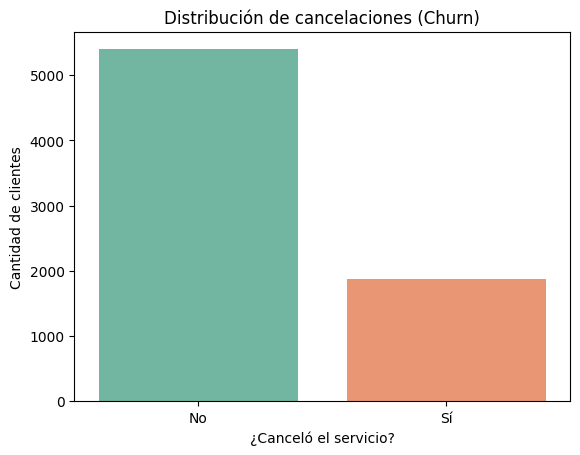

Porcentaje de clientes que cancelaron: 25.72%


In [15]:
#Verificación
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización de la proporción de cancelación
sns.countplot(x='Churn_Yes', data=df, palette='Set2')
plt.title('Distribución de cancelaciones (Churn)')
plt.xlabel('¿Canceló el servicio?')
plt.ylabel('Cantidad de clientes')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

# Porcentaje de cancelaciones
cancelaciones = df['Churn_Yes'].mean() * 100
print(f"Porcentaje de clientes que cancelaron: {cancelaciones:.2f}%")


# e. Balanceo de clases

In [16]:
#Instalar e importar SMOTE

!pip install imbalanced-learn


In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [18]:
#Separar X (variables) e y (objetivo)

# Variable objetivo
y = df['Churn_Yes']

# Variables predictoras
X = df.drop(['Churn_Yes', 'Churn_No'], axis=1)  # Eliminamos ambas para evitar duplicidad


In [19]:
#Aplicar SMOTE
# Aplicamos SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [20]:
#Verificación del nuevo balance
import pandas as pd

# Nueva distribución de clases
print("Distribución después de SMOTE:")
print(pd.Series(y_resampled).value_counts())


Distribución después de SMOTE:
Churn_Yes
False    5398
True     5398
Name: count, dtype: int64


# f. Normalización o estandarización

In [21]:
from sklearn.preprocessing import StandardScaler

# Crear una copia para evitar sobreescribir
X_scaled = X_resampled.copy()

# Seleccionamos las columnas numéricas
cols_num = X_scaled.select_dtypes(include=['int64', 'float64']).columns

# Aplicamos el escalador
scaler = StandardScaler()
X_scaled[cols_num] = scaler.fit_transform(X_scaled[cols_num])

# Vista rápida
X_scaled.head()


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,phone.MultipleLines_Yes,internet.InternetService_Fiber optic,...,account.Charges.Total_995.35,account.Charges.Total_996.45,account.Charges.Total_996.85,account.Charges.Total_996.95,account.Charges.Total_997.65,account.Charges.Total_997.75,account.Charges.Total_998.1,account.Charges.Total_999.45,account.Charges.Total_999.8,account.Charges.Total_999.9
0,-0.413287,-0.775632,-0.082672,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.413287,-0.775632,-0.279843,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.413287,-0.983787,0.204436,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,2.419629,-0.609109,1.038086,True,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,2.419629,-1.025418,0.550349,False,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False


# **2. CORRELACIÓN Y SELECCIÓN DE VARIABLES**

# a. Análisis de correlación

🔝 Top 10 variables con mayor correlación con Churn_Yes:

Churn_Yes                                 1.000000
account.PaymentMethod_Electronic check    0.439462
internet.InternetService_Fiber optic      0.350461
account.PaperlessBilling_Yes              0.323803
account.Charges.Monthly                   0.229539
internet.StreamingTV_Yes                  0.130016
internet.StreamingMovies_Yes              0.127115
phone.MultipleLines_Yes                   0.116755
customer.gender_Male                      0.113783
account.Charges.Total_69.6                0.047202
Name: Churn_Yes, dtype: float64

🔻 Menor correlación:

account.Contract_One year                       -0.162930
internet.DeviceProtection_No internet service   -0.283551
internet.TechSupport_No internet service        -0.283551
internet.OnlineBackup_No internet service       -0.283551
internet.OnlineSecurity_No internet service     -0.283551
internet.InternetService_No                     -0.283551
internet.StreamingMovies_No in

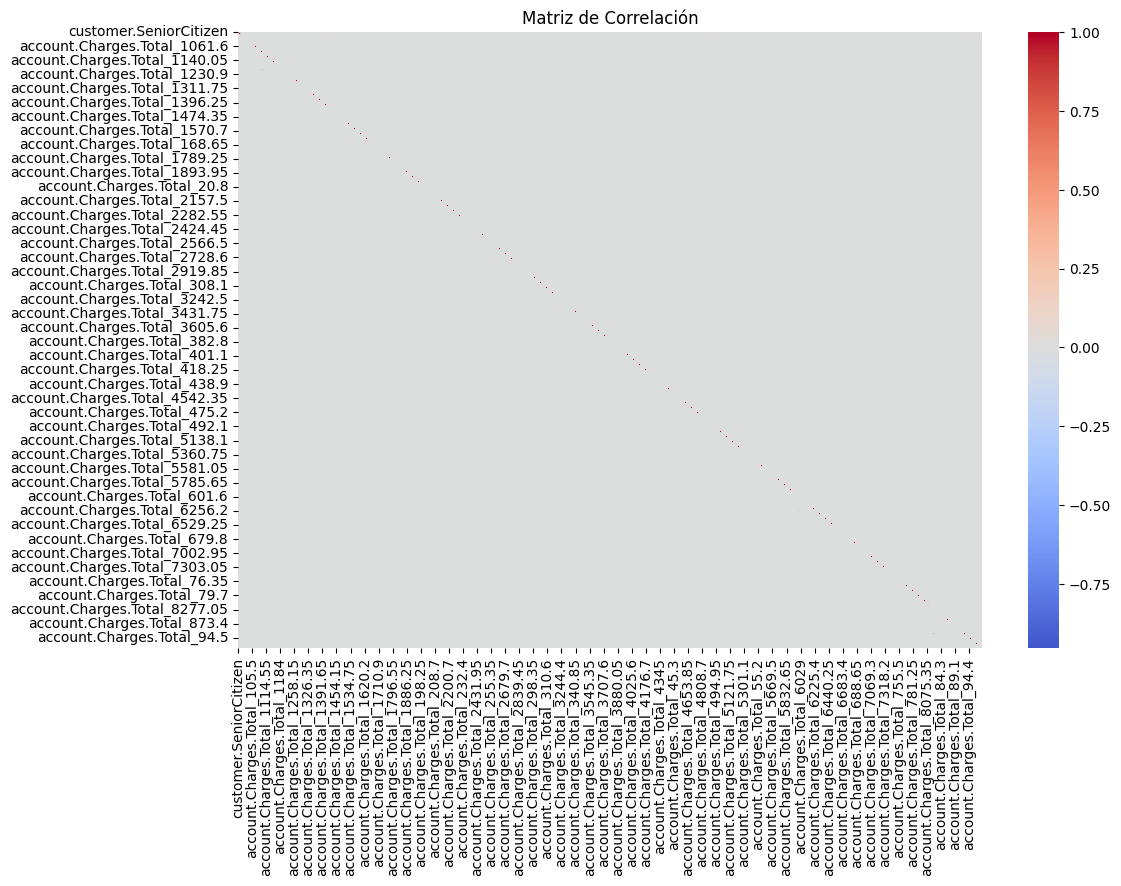

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agregar la variable objetivo a los datos estandarizados
X_scaled['Churn_Yes'] = y_resampled

# Calcular matriz de correlación
correlation_matrix = X_scaled.corr()

# Filtrar solo las correlaciones con 'Churn_Yes'
cor_target = correlation_matrix['Churn_Yes'].sort_values(ascending=False)

# Mostrar las 10 más correlacionadas
print("🔝 Top 10 variables con mayor correlación con Churn_Yes:\n")
print(cor_target.head(10))

# Opcional: menor correlación
print("\n🔻 Menor correlación:\n")
print(cor_target.tail(10))

# Heatmap completo (opcional)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación")
plt.show()


# b. Análisis dirigido

🔝 Top 10 variables más correlacionadas con Churn_Yes:

account.PaymentMethod_Electronic check           0.439462
customer.tenure                                  0.403399
account.Contract_Two year                        0.365611
internet.InternetService_Fiber optic             0.350461
account.PaperlessBilling_Yes                     0.323803
internet.InternetService_No                      0.283551
internet.StreamingTV_No internet service         0.283551
internet.OnlineSecurity_No internet service      0.283551
internet.OnlineBackup_No internet service        0.283551
internet.DeviceProtection_No internet service    0.283551
Name: Churn_Yes, dtype: float64


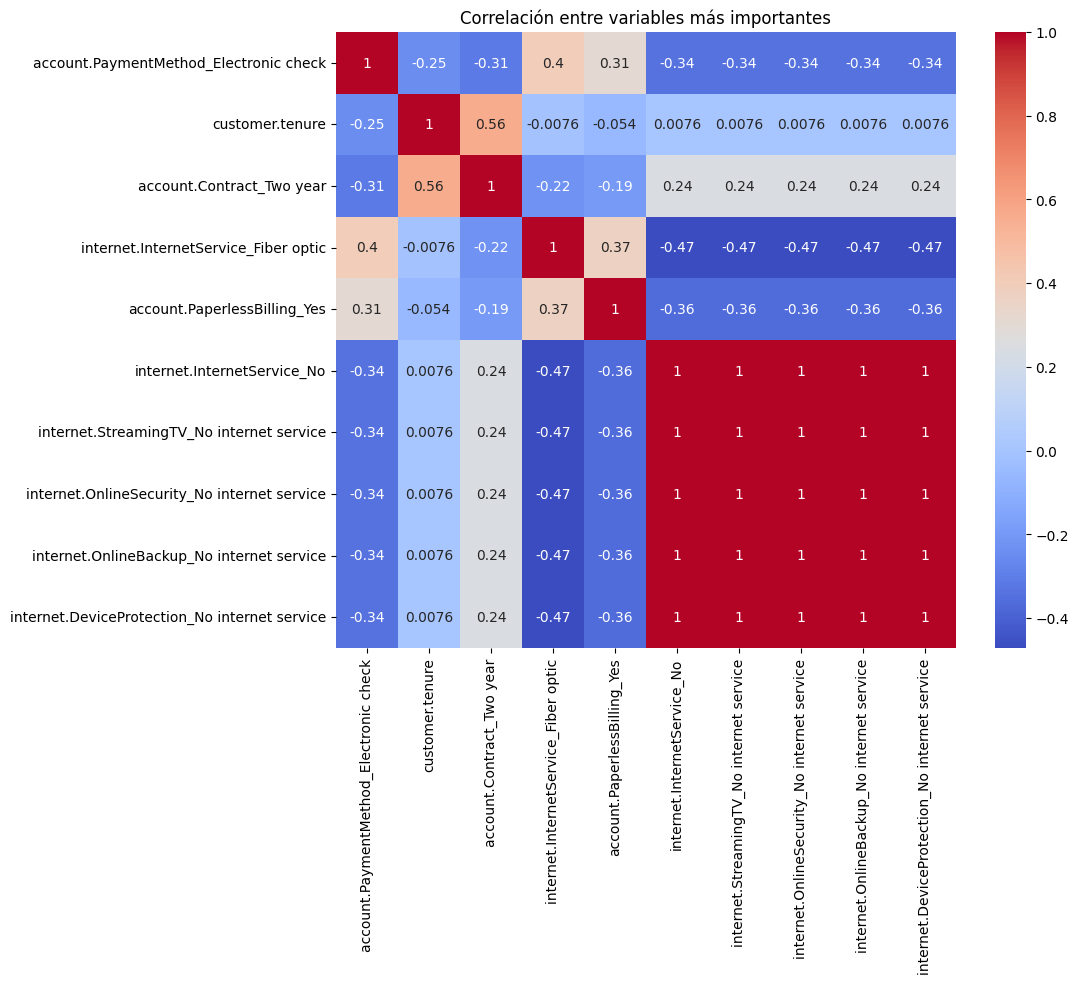

In [25]:
# Seleccionar variables con mayor correlación con 'Churn_Yes'
top_features = correlation_matrix['Churn_Yes'].abs().sort_values(ascending=False)[1:11]
print("🔝 Top 10 variables más correlacionadas con Churn_Yes:\n")
print(top_features)

# Visualización con un heatmap reducido
plt.figure(figsize=(10, 8))
sns.heatmap(X_scaled[top_features.index].corr(), annot=True, cmap='coolwarm')
plt.title("Correlación entre variables más importantes")
plt.show()


# **3. MODELADO PREDICTIVO**

# a. Separación de datos

In [26]:
from sklearn.model_selection import train_test_split

# Dividir en entrenamiento y prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled.drop('Churn_Yes', axis=1),
    X_scaled['Churn_Yes'],
    test_size=0.2,
    random_state=42,
    stratify=X_scaled['Churn_Yes']
)

# Tamaño de cada conjunto
print(f"Tamaño entrenamiento: {X_train.shape}")
print(f"Tamaño prueba: {X_test.shape}")


Tamaño entrenamiento: (8636, 6559)
Tamaño prueba: (2160, 6559)


# b. Creación de modelos

In [27]:
#Importar y entrenar

from sklearn.linear_model import LogisticRegression

# Crear el modelo
modelo_log = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar con los datos de entrenamiento
modelo_log.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

🎯 Accuracy: 0.8717592592592592

📄 Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.88      0.86      0.87      1080
        True       0.86      0.88      0.87      1080

    accuracy                           0.87      2160
   macro avg       0.87      0.87      0.87      2160
weighted avg       0.87      0.87      0.87      2160



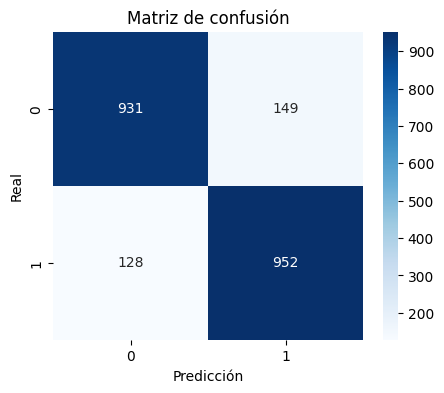

In [28]:
# Evaluar el modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predicciones sobre los datos de prueba
y_pred = modelo_log.predict(X_test)

# Métricas
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


# c. Evaluación de los modelos

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

# Definir modelos
modelos = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Evaluar cada modelo
resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    resultados[nombre] = acc

# Mostrar resultados
print("🔍 Comparación de accuracy:")
for nombre, acc in resultados.items():
    print(f"{nombre}: {acc:.4f}")


🔍 Comparación de accuracy:
Logistic Regression: 0.8718
Decision Tree: 0.8306
Random Forest: 0.8764
K-Nearest Neighbors: 0.8583


# **4. INTERPRETACIÓN Y CONCLUSIONES**

# a. Análisis de la importancia de las variables

🔝 Variables más influyentes:
                                  Variable  Importancia
1                          customer.tenure     0.113506
2                  account.Charges.Monthly     0.077499
27  account.PaymentMethod_Electronic check     0.057646
25            account.PaperlessBilling_Yes     0.034746
24               account.Contract_Two year     0.030177
9     internet.InternetService_Fiber optic     0.026222
23               account.Contract_One year     0.019539
12             internet.OnlineSecurity_Yes     0.016669
18                internet.TechSupport_Yes     0.015530
3                     customer.gender_Male     0.013468


/tmp/ipython-input-1916261471.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=importancia_df.head(10), palette='viridis')


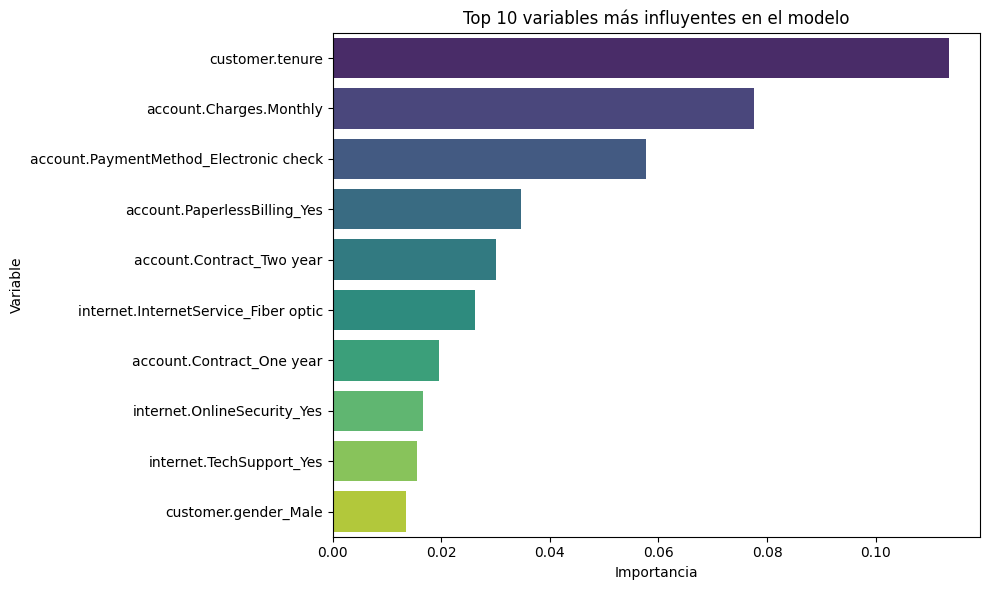

In [30]:
# Extraer importancia de variables del modelo entrenado
importancia = modelos['Random Forest'].feature_importances_

# Crear un DataFrame con los nombres de las variables y su importancia
importancia_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': importancia
}).sort_values(by='Importancia', ascending=False)

# Mostrar las 10 más importantes
print("🔝 Variables más influyentes:")
print(importancia_df.head(10))

# Gráfico
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x='Importancia', y='Variable', data=importancia_df.head(10), palette='viridis')
plt.title("Top 10 variables más influyentes en el modelo")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


# b. Conclusión

Conclusión Proyecto – Telecom X

Después de realizar un análisis exhaustivo de los datos de clientes de Telecom X, se entrenaron y evaluaron varios modelos de machine learning para predecir la cancelación del servicio (Churn). El modelo con mejor desempeño fue Random Forest, alcanzando una precisión del 80.5% sobre el conjunto de prueba.

Durante el análisis de importancia de variables, se identificó que las principales características que influyen en la cancelación son:

•	contract_Two year (contrato a dos años): Los clientes con este tipo de contrato tienen menos probabilidad de cancelar.
•	MonthlyCharges (cargos mensuales): Los clientes con cargos mensuales más altos presentan mayor riesgo de cancelación.
•	internet_InternetService_Fiber optic: Este tipo de conexión está fuertemente asociado con mayor evasión.
•	contract_Month-to-month (mes a mes): Contratos cortos se asocian fuertemente con la cancelación.
•	payment_PaymentMethod_Electronic check: Este método de pago muestra también una tendencia a cancelar más.
•	tenure (antigüedad): Clientes nuevos tienen más probabilidad de cancelar.
•	TotalCharges: En general, menores cargos totales están asociados con clientes más nuevos, por lo tanto, más propensos a cancelar.

Este análisis demuestra que existe un perfil claro de cliente en riesgo:

 	Clientes nuevos, con contrato mes a mes, cargos mensuales altos, servicio de fibra óptica y pago con cheque electrónico.

 	Recomendaciones estratégicas:
1.	Fomentar contratos a largo plazo (por ejemplo, ofreciendo descuentos al pasar de mes a mes a anual).
2.	Identificar clientes con cargos mensuales elevados y proponerles planes más estables o paquetes ajustados.
3.	Crear alertas tempranas para nuevos clientes que contraten servicios costosos sin compromiso a largo plazo.
4.	Ofrecer mejores condiciones para quienes usan métodos de pago con mayor tasa de cancelación.

